In [1]:
using DynamicalSystems


In [2]:
using CairoMakie

In [8]:
function x_func(u, p)
    
    if u[1] <= 0
        return p[1] / ( 1 - u[1] ) + u[2]
        
    elseif u[1] > 0 && u[1] < p[1] + u[2] && u[3] <= 0
        return p[1] + u[2]
        
    else
        return -1
        
    end
end

function xi(x, xth)

    if x>(xth)
        return 1
    else
          return 0
    end
end

xi (generic function with 1 method)

## one element

In [ ]:
function  rulkov_rule(u, p, t)
    
    α, σ, μ = p
    x, y, z = u
    
    xn = x_func(u, p)
    yn = y + μ * ( -x - 1 + σ )
    zn = x
    
    return SVector{3}(xn, yn, zn )
    
end

In [83]:
u0 = [0.0, 0.0, 0.0]

p = [4.6,
    -0.1,
    0.001]
time = 10000
Ttr = 5000

5000

In [84]:
ds = DiscreteDynamicalSystem(rulkov_two_coupled_rule, u0, p)

3-dimensional discrete dynamical system
 state:       [0.0, 0.0, 0.0]
 rule f:      rulkov_two_coupled_rule
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [4.6, -0.1, 0.001]

## two coupled

In [3]:
function  rulkov_two_coupled_rule(u, p, t)
    
    α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el  = p
    x1, y1, z1, x2, y2, z2, I12, I21 = u
    
    if g1 > 0 && g2 >0
        k = 2
    else
        k = 1
    end
    
    I21n = γ1 * I21 + g2 * (xrp - x1) * xi(x2, xth)
    I12n = γ2 * I12 + g1 * (xrp - x2) * xi(x1, xth)
    
    u1 = [ x1, y1 + Βsyn * I21n / k, z1 ]
    
    xn1 = x_func(u1, p)
    yn1 = y1 +μ * (-x1 - 1 + σ + σsyn * I21n / k + g_el * (x2 - x1) )
    zn1 = x1
    
    u2 = [ x2, y2 + Βsyn * I12n / k, z2 ]
    
    xn2 = x_func(u2, p)
    yn2 = y2 +μ * (-x2 - 1 + σ + σsyn * I21n / k + g_el * (x1 - x2))
    zn2 = x2
    
    return SVector{8}(xn1, yn1, zn1, xn2, yn2, zn2, I12n, I21n )
    
end

rulkov_two_coupled_rule (generic function with 1 method)

In [25]:
α = 4.6
σ = -0.1
μ = 0.001

Βsyn = 0.0001
σsyn = 1.0

xrp = -1.5
xth = -0.8

γ1 = 0.5
γ2 = 0.5

g1 = 0.8
g2 = 8.0
g_el = 0.1

I12 = I21 = 0

0

In [26]:
u0 = [0.1, 0.1, 0.1, 1, 1, 1,
        0.0, 0.0]

p = [α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el]

time = 500000
Ttr = 50000

50000

In [27]:
ds_coupled = DiscreteDynamicalSystem(rulkov_two_coupled_rule, u0, p)

8-dimensional discrete dynamical system
 state:       [0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 0.0, 0.0]
 rule f:      rulkov_two_coupled_rule
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [4.6, -0.1, 0.001, 0.0001, 1.0, …, 0.5, 0.5, 0.8, 8.0, 0.1]

In [28]:
tr = trajectory(ds_coupled, time)

8-dimensional Dataset{Float64} with 500001 points
  0.1       0.1         0.1       1.0      …   0.0            0.0
 -1.0       0.09231     0.1      -1.0         -2.0          -12.8
  2.39199   0.08901    -1.0       3.29154     -1.0           -6.4
  4.68729   0.0682601   2.39199   5.58807     -4.33323      -34.3359
 -1.0       0.0290496   4.68729  -1.0         -7.83707      -66.6663
  2.32738   0.012283   -1.0       3.22669  …  -3.91854      -33.3332
  4.60992  -0.0148771   2.32738   5.50984     -5.74062      -47.2856
 -1.0      -0.0569381   4.60992  -1.0         -8.47818      -72.5222
  2.24125  -0.0751687  -1.0       3.13925     -4.23909      -36.2611
  4.52243  -0.10263     2.24125   5.42094     -5.83095      -48.0605
 -1.0      -0.144447    4.52243  -1.0      …  -8.45222      -72.2097
  2.15375  -0.1626     -1.0       3.0503      -4.22611      -36.1048
  4.43504  -0.189584    2.15375   5.33208     -5.7533       -47.2824
  ⋮                                        ⋱                
 

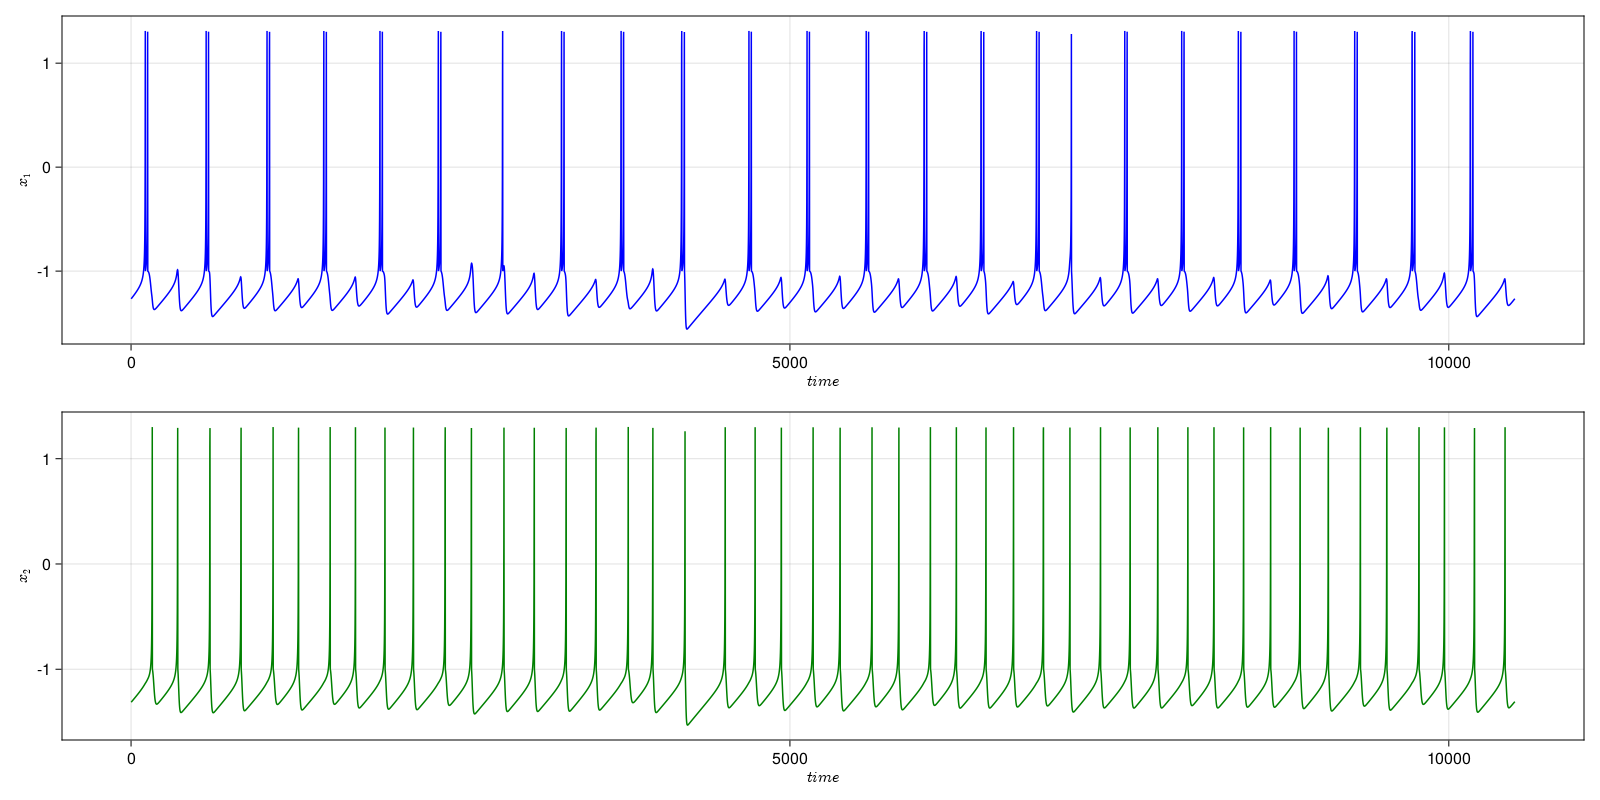

In [29]:
fig = Figure(resolution = (1600, 800))

ax1 = Axis(fig[1, 1], xlabel = L"time", ylabel = L"x_1")
ax2 = Axis(fig[2, 1], xlabel = L"time", ylabel = L"x_2")

lines!(ax1, columns(tr)[1][2000:12500], color = "blue")
lines!(ax2, columns(tr)[4][2000:12500], color = "green")
fig

## three coupled

In [30]:
function  rulkov_three_coupled_rule(u, p, t)
    
    α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el = p
    
    x1, y1, z1, x2, y2, z2, x3, y3, z3, I21, I31, I12, I32, I13, I23 = u
    
    
    if g1 > 0 && g2 >0
        k = 2
    else
        k = 1
    end
    
    I21n = γ2 * I21 + g2 * (xrp - x1) * xi(x2, xth)
    I31n = γ1 * I31 + g1 * (xrp - x1) * xi(x3, xth)
    
    I12n = γ1 * I12 + g1 * (xrp - x2) * xi(x1, xth)
    I32n = γ2 * I32 + g2 * (xrp - x2) * xi(x3, xth)
    
    I23n = γ1 * I23 + g1 * (xrp - x3) * xi(x2, xth)
    I13n = γ2 * I13 + g2 * (xrp - x3) * xi(x1, xth)
    
    u1 = [ x1, y1 + Βsyn * (I21n + I31n) / k, z1 ]
    
    xn1 = x_func(u1, p)
    yn1 = y1 +μ * (-x1 - 1 + σ + σsyn * (I21n + I31n) / k + g_el * (x2 - x1) + g_el * (x3 - x1) )
    zn1 = x1
    
    u2 = [ x2, y2 + Βsyn * (I12n + I32n) / k, z2 ]
    
    xn2 = x_func(u2, p)
    yn2 = y2 +μ * (-x2 - 1 + σ + σsyn * (I12n + I32n) / k + g_el * (x1 - x2) + g_el * (x3 - x2) )
    zn2 = x2
    
    u3 = [ x3, y3 + Βsyn * (I13n + I23n) / k, z3 ]
    
    xn3 = x_func(u3, p)
    yn3 = y3 +μ * (-x3 - 1 + σ + σsyn * (I13n + I23n) / k + g_el * (x1 - x3) + g_el * (x2 - x3) )
    zn3 = x3
    
    return SVector{15}(xn1, yn1, zn1, xn2, yn2, zn2, xn3, yn3, zn3,
                        I21n, I31n, I12n, I32n, I13n, I23n)
    
end

rulkov_three_coupled_rule (generic function with 1 method)

In [48]:
α = 5.6
σ = 0.225
μ = 0.001

Βsyn = 0.0001
σsyn = 1.0

xrp = -1.5
xth = -0.8

γ1 = 0.0
γ2 = 0.0

g1 = 3.0
g2 = 7.0
g_el = 1.0

I21 = I31 = I12 = I32 = I13 = I23 = 0

0

In [49]:
u0 = [0.1, 0.1, 0.1,
    0.0, 0.0, 0.0,
    0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

p = [α, σ, μ, Βsyn, σsyn, xrp, xth, γ1, γ2, g1, g2, g_el]

time = 500000
Ttr = 50000

50000

In [50]:
ds_coupled3 = DiscreteDynamicalSystem(rulkov_three_coupled_rule, u0, p)

15-dimensional discrete dynamical system
 state:       [0.1, 0.1, 0.1, 0.0, 0.0, 0.0, …, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 rule f:      rulkov_three_coupled_rule
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [5.6, 0.225, 0.001, 0.0001, 1.0, …, 0.0, 0.0, 3.0, 7.0, 1.0]